# Ordinary Differential Equation

In this section, we solve the following second-order ordinary differential equation (ODE) using the **finite difference method**:
$$
\frac{d^2u}{dx^2} + a\frac{du}{dx} = b
$$
where:
- $u(x)$ is the unknown function to be solved,
- $a$ and $b$ are constants,
- $x$ is the independent variable.

This equation arises in various physical and engineering applications, such as heat conduction, fluid flow, and mechanical vibrations. For the numerical exercise we are going to solve here, let's assume that:

In [1]:
a, b = 1, 1

## Boundary Conditions
For the following Dirichlet boundary conditions:

$$
u(0) = \alpha, \quad u(1) = \beta,
$$

Let's assume that:

In [2]:
alpha, beta = 1, 1 # Define boundary conditions

The analytical solution is given as following:

$$
𝑢 = c_1 e^{-ax}+\frac{b}{a}𝑥+c_2
$$

where the coefficients are defined as below:

$$
c_1 = \frac{b/a-(\beta-\alpha)}{1-e^{-a}}, \quad c_2 = \alpha-c_1
$$

Python function that implements the analytical solution is as following:

In [3]:
import numpy as np

In [4]:
def analytical(N,alpha=1,beta=1,a=1,b=1):
    """
    Parameters:
    -----------
    x : float or array-like
        The input value(s) at which the analytical solution is evaluated.

    Returns:
    --------
    float or numpy.ndarray
        The computed analytical solution for the given x.
    """
    x = np.linspace(0,1,N)
    c1 = (b/a-beta+alpha)/(1-np.exp(-a))
    c2 = (alpha-c1)
    return x,c1*np.exp(-a*x)+b/a*x+c2

To implement the analytical solution, we will create numpy array and call analytical function to calculate the solution:

In [5]:
x,u = analytical(100,alpha=alpha,beta=beta,a=a,b=b)

To visualize the result, we will use matplotlib.pyplot:

In [6]:
import matplotlib.pyplot as plt

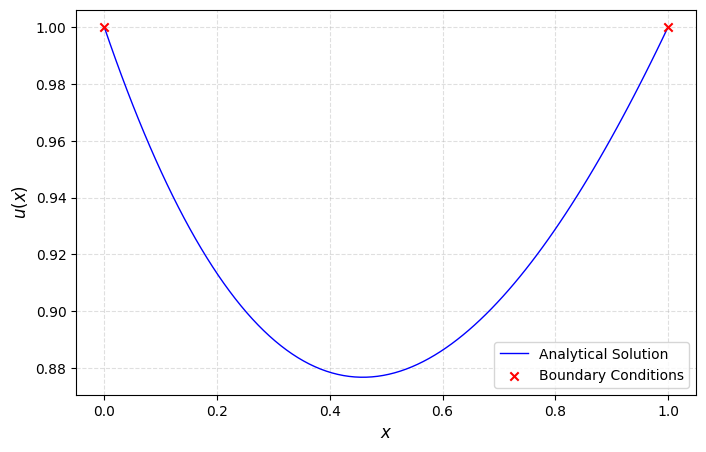

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(x,u,label='Analytical Solution', color='b', linewidth=1)
plt.scatter([0, 1],[alpha,beta],marker='x',color='red',label='Boundary Conditions',zorder=3)
plt.xlabel(r'$x$', fontsize=12)
plt.ylabel(r'$u(x)$', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

## Discretization Using Finite Difference

To approximate the derivatives in the equation, we use the finite difference method. Using the central difference approach first and second derivative are given as follows:
  
$$
\frac{du}{dx} \approx \frac{u_{i+1} - u_{i-1}}{2\Delta x}, \quad \frac{d^2u}{dx^2} \approx \frac{u_{i+1} - 2u_i + u_{i-1}}{\Delta x^2}
$$

Substituting these approximations into the differential equation results in a system of algebraic equations:

$$
\frac{u_{i+1} - 2u_i + u_{i-1}}{\Delta x^2} + a\frac{u_{i+1} - u_{i-1}}{2\Delta x} \approx b
$$

Rearranging the formula for the following discretization:

$\dots, \quad x_{i-1}, \quad x_i, \quad x_{i+1}, \quad \dots$

$$
\left(\frac{1}{\Delta x^2} - \frac{a}{2\Delta x}\right)u_{i-1}-\left(\frac{2}{\Delta x^2}\right)u_{i}+\left(\frac{1}{\Delta x^2} + \frac{a}{2\Delta x}\right)u_{i+1} \approx b
$$

where the interval count is equal to N. Let's start from the simple and assume that $N$ = 4

In [9]:
N = 4; xn = np.linspace(0,1,N+1)

For the indexing that starts from $i$ = 0, the boundary conditions are implemented as following:

$$
\frac{u_{-1}+u_{0}}{2} = \alpha, \quad \frac{u_{N-1}+u_{N}}{2} = \beta,
$$

The equations are written as following:

$$
\left(\frac{1}{\Delta x^2} - \frac{a}{2\Delta x}\right)u_{-1}-\left(\frac{2}{\Delta x^2}\right)u_{0}+\left(\frac{1}{\Delta x^2} + \frac{a}{2\Delta x}\right)u_{1} \approx b
$$

$$
\left(\frac{1}{\Delta x^2} - \frac{a}{2\Delta x}\right)u_{0}-\left(\frac{2}{\Delta x^2}\right)u_{1}+\left(\frac{1}{\Delta x^2} + \frac{a}{2\Delta x}\right)u_{2} \approx b
$$

$$
\left(\frac{1}{\Delta x^2} - \frac{a}{2\Delta x}\right)u_{1}-\left(\frac{2}{\Delta x^2}\right)u_{2}+\left(\frac{1}{\Delta x^2} + \frac{a}{2\Delta x}\right)u_{3} \approx b
$$

$$
\left(\frac{1}{\Delta x^2} - \frac{a}{2\Delta x}\right)u_{2}-\left(\frac{2}{\Delta x^2}\right)u_{3}+\left(\frac{1}{\Delta x^2} + \frac{a}{2\Delta x}\right)u_{4} \approx b
$$

Here, the $u$ values are defined at the center of each element:

In [10]:
xc = (xn[:-1]+xn[1:])/2

After implementing boundary conditions, and rearranging the equations:

$$
-\left(\frac{3}{\Delta x^2}-\frac{a}{2\Delta x}\right)u_{0}+\left(\frac{1}{\Delta x^2} + \frac{a}{2\Delta x}\right)u_{1} \approx b-2\alpha\left(\frac{1}{\Delta x^2}-\frac{a}{2\Delta x}\right)
$$

$$
\left(\frac{1}{\Delta x^2} - \frac{a}{2\Delta x}\right)u_{0}-\left(\frac{2}{\Delta x^2}\right)u_{1}+\left(\frac{1}{\Delta x^2} + \frac{a}{2\Delta x}\right)u_{2} \approx b
$$

$$
\left(\frac{1}{\Delta x^2} - \frac{a}{2\Delta x}\right)u_{1}-\left(\frac{2}{\Delta x^2}\right)u_{2}+\left(\frac{1}{\Delta x^2} + \frac{a}{2\Delta x}\right)u_{3} \approx b
$$

$$
\left(\frac{1}{\Delta x^2} - \frac{a}{2\Delta x}\right)u_{2}-\left(\frac{3}{\Delta x^2} + \frac{a}{2\Delta x}\right)u_3 \approx b-2\beta\left(\frac{1}{\Delta x^2} + \frac{a}{2\Delta x}\right)
$$

The size of element is defined as following:

In [11]:
dx = 1./N

This simplifies to the following matrix form:

$$
\left(\begin{bmatrix}
-\left(\frac{2}{\Delta x^2}\right) & \left(\frac{1}{\Delta x^2} + \frac{a}{2\Delta x}\right) & 0 & 0 \\
\left(\frac{1}{\Delta x^2} - \frac{a}{2\Delta x}\right) & -\left(\frac{2}{\Delta x^2}\right) & \left(\frac{1}{\Delta x^2} + \frac{a}{2\Delta x}\right) & 0 \\
0 & \left(\frac{1}{\Delta x^2} - \frac{a}{2\Delta x}\right) & -\left(\frac{2}{\Delta x^2}\right) & \left(\frac{1}{\Delta x^2} + \frac{a}{2\Delta x}\right) \\
0 & 0 & \left(\frac{1}{\Delta x^2} - \frac{a}{2\Delta x}\right) & -\left(\frac{2}{\Delta x^2}\right)
\end{bmatrix}-
\begin{bmatrix}
\left(\frac{1}{\Delta x^2} - \frac{a}{2\Delta x}\right) & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & \left(\frac{1}{\Delta x^2} + \frac{a}{2\Delta x}\right)
\end{bmatrix}
\right)
\begin{bmatrix}
u_{0} \\
u_{1} \\
u_{2} \\
u_{3}
\end{bmatrix}=
\begin{bmatrix}
b \\
b \\
b \\
b
\end{bmatrix}-
\begin{bmatrix}
2\alpha\left(\frac{1}{\Delta x^2}-\frac{a}{2\Delta x}\right) \\
0 \\
0 \\
2\beta\left(\frac{1}{\Delta x^2} + \frac{a}{2\Delta x}\right)
\end{bmatrix}
$$


And can be written in the following form:

$$
\left(\mathbf{A} - \mathbf{J}\right) \mathbf{u} = \mathbf{y} - \mathbf{q}
$$


It is implemented with the numpy arrays as following. First, let's initialize the matrices:

In [12]:
A = np.zeros((N,N))
J = np.zeros((N,N))
y = np.zeros((N,1))
q = np.zeros((N,1))

The matrix $\mathbf{A}$ is filled as following:

In [13]:
for i in range(N):
    A[i,i] = -2/dx**2
    if i>0:
        A[i,i-1] = 1/dx**2-a/(2*dx)
    if i<N-1:
        A[i,i+1] = 1/dx**2+a/(2*dx)

The matrix $\mathbf{J}$ is filled as following:

In [14]:
J[0,0] = 1/dx**2-a/(2*dx)
J[N-1,N-1] = 1/dx**2+a/(2*dx)

The vector $\mathbf{y}$ is filled as following:

In [15]:
y[:] = b

The vector $\mathbf{q}$ is filled as following:

In [16]:
q[0] = 2*alpha*(1/dx**2-a/(2*dx))
q[N-1] = 2*beta*(1/dx**2+a/(2*dx))

The solution for $\mathbf{u}$ is obtained at the center of intervals:

In [17]:
uc = np.linalg.solve(A-J,y-q)

Plotting the results:

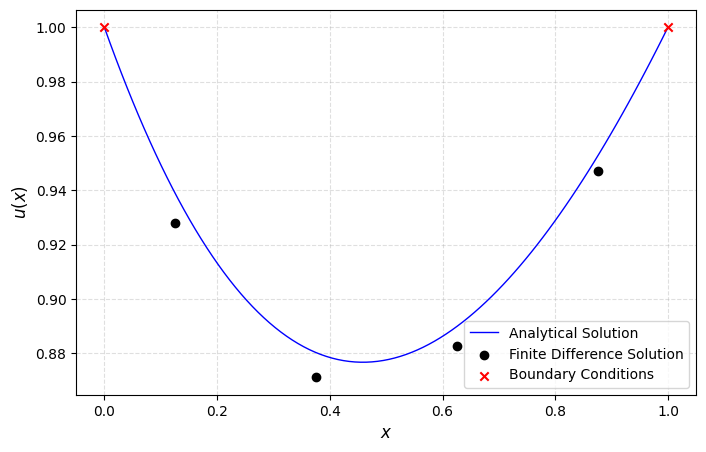

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(x,u,label='Analytical Solution', color='b', linewidth=1)
plt.scatter(xc,uc,color='black',label='Finite Difference Solution')
plt.scatter([0, 1],[alpha,beta],marker='x',color='red',label='Boundary Conditions',zorder=3)
plt.xlabel(r'$x$', fontsize=12)
plt.ylabel(r'$u(x)$', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

The accuracy of the plot can be improved by decreasing the interval size (increasing computation time). To refine the solution, we implement the finite function as following:

In [19]:
def finite(N,alpha=1,beta=1,a=1,b=1):
    """
    Solves a second-order finite difference equation with given coefficients.
    
    Parameters:
    N (int): Number of discretization points.

    Returns:
    xc (numpy.ndarray): Midpoints of the discretized domain.
    uc (numpy.ndarray): Solution of the finite difference equation.
    """
    A = np.zeros((N,N))
    J = np.zeros((N,N))
    y = np.zeros((N,1))
    q = np.zeros((N,1))
    
    # Step size
    dx = 1.0/N

    for i in range(N):
        A[i,i] = -2/dx**2
        if i>0:
            A[i,i-1] = 1/dx**2-a/(2*dx)
        if i<N-1:
            A[i,i+1] = 1/dx**2+a/(2*dx)

    J[0,0] = 1/dx**2-a/(2*dx)
    J[N-1,N-1] = 1/dx**2+a/(2*dx)

    y[:] = b

    q[0] = 2*alpha*(1/dx**2-a/(2*dx))
    q[N-1] = 2*beta*(1/dx**2+a/(2*dx))
    
    # Solve the linear system
    uc = np.linalg.solve(A-J,y-q)

    # Define grid points
    xn = np.linspace(0,1,N+1)  # Cell edges
    xc = (xn[:-1]+xn[1:])/2    # Cell centers

    return xc, uc

Test the solutions yourself:

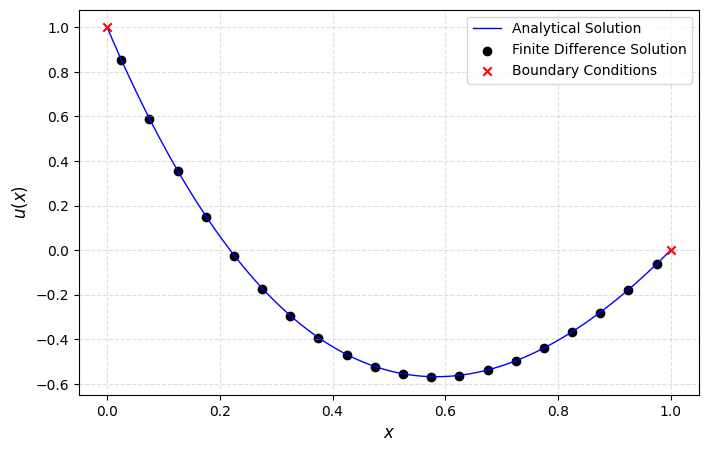

In [20]:
alpha,beta = 1,0

a, b = 1,7.5

x,u = analytical(100,alpha=alpha,beta=beta,a=a,b=b)

xc,uc = finite(20,alpha=alpha,beta=beta,a=a,b=b)

plt.figure(figsize=(8, 5))
plt.plot(x,u,label='Analytical Solution', color='b', linewidth=1)
plt.scatter(xc,uc,color='black',label='Finite Difference Solution')
plt.scatter([0, 1],[alpha,beta],marker='x',color='red',label='Boundary Conditions',zorder=3)
plt.xlabel(r'$x$', fontsize=12)
plt.ylabel(r'$u(x)$', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()